Github repo link: https://github.com/clairestewart03/ML-fundamentals-2025/blob/main/assignment_1_claire_stewart.ipynb

In [2]:
# Getting Started

# Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import Lasso


            pclass     survived          age        sibsp        parch  \
count  1309.000000  1309.000000  1046.000000  1309.000000  1309.000000   
mean      2.294882     0.381971    29.881135     0.498854     0.385027   
std       0.837836     0.486055    14.413500     1.041658     0.865560   
min       1.000000     0.000000     0.166700     0.000000     0.000000   
25%       2.000000     0.000000    21.000000     0.000000     0.000000   
50%       3.000000     0.000000    28.000000     0.000000     0.000000   
75%       3.000000     1.000000    39.000000     1.000000     0.000000   
max       3.000000     1.000000    80.000000     8.000000     9.000000   

              fare        body  
count  1308.000000  121.000000  
mean     33.295479  160.809917  
std      51.758668   97.696922  
min       0.000000    1.000000  
25%       7.895800   72.000000  
50%      14.454200  155.000000  
75%      31.275000  256.000000  
max     512.329200  328.000000  
<class 'pandas.core.frame.DataFrame'

Text(0.5, 1.0, 'Age Distribution of Passengers Who Did Not Survive')

<Figure size 640x480 with 0 Axes>

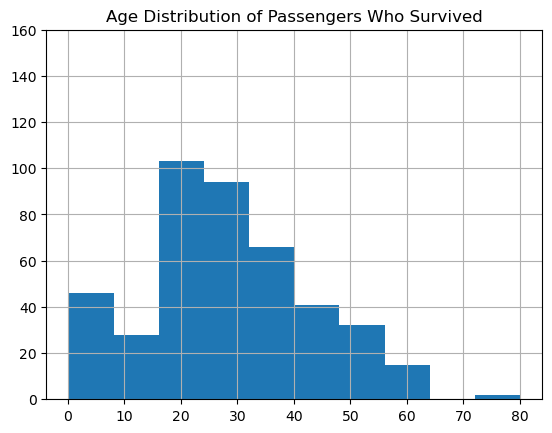

<Figure size 640x480 with 0 Axes>

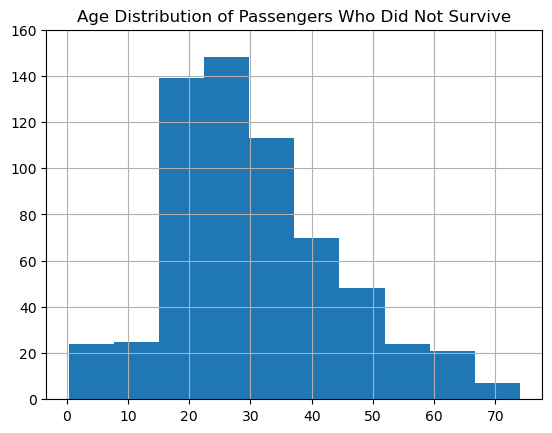

In [3]:
# Task 1: Data Loading and Initial Exploration

# Loading data into DataFrame
titanic_data = pd.read_excel("/Users/clairestewart/ML-fundamentals-2025/titanic3.xls")

# Statistical description of the data to see trends in the dataset 
print(titanic_data.describe())
print(titanic_data.info())

# Data Visualization

# Age Distribution of passengers who survived
survived = titanic_data[titanic_data['survived'] == 1]
plt.figure("Age Distribution - Survived")  
survived.hist(column='age')
plt.ylim(0, 160)
plt.title('Age Distribution of Passengers Who Survived')


# Age Distribution of passengers who did not survive
not_survived = titanic_data[titanic_data['survived'] == 0]
plt.figure('Age Distribution - Not Survived')
not_survived.hist(column='age')
plt.ylim(0, 160)
plt.title('Age Distribution of Passengers Who Did Not Survive')


#### Analysis of Task 1:
I chose to visualize the data based on the age distribition for both the survivors and non-survivors because initially this is something that seems like it would affect the chance of survival. Furthermore, histograms are easy to understand and clearly show the distribution of a column, like age.

From these histograms we can see that there were more non-survivors than survivors in the dataset. This means there is a imbalance between the classes that we will address later. We can also see that more people aged 50-80 did not survive than did survive, which aligns with my initial predictions/thoughts. 

In [5]:
# Task 2: Managing Missing Values

# Printing before imputation
print('Missing Values Before Imputation')
print(titanic_data.isnull().sum())

# Before any missing values are filled, the columns with missing values are: 
# age: 263, fare: 1, cabin: 1014, embarked: 2, boat: 823, body: 1188, and home.dest: 564

# Age:
# Filling in the missing values with the mean age. 
mean_age = titanic_data['age'].mean()
titanic_data['age'] = titanic_data['age'].fillna(mean_age)

# Fare
# Filling in fares with the median 
median_fare = titanic_data['fare'].median()
titanic_data['fare'] = titanic_data['fare'].fillna(median_fare)


# Home.Dest
# Filling in home destination with the mode
home_mode = titanic_data['home.dest'].mode()
titanic_data['home.dest'] = titanic_data['home.dest'].fillna(str(home_mode))

# Embarked
# Filling in Embarked with the mode
embark_mode = titanic_data['embarked'].mode()[0]
titanic_data['embarked'] = titanic_data['embarked'].fillna(str(embark_mode))


# Boat
# All the missing values are for those who did not survive, so I am filling it in with a placeholder (-1)
titanic_data['boat'] = titanic_data['boat'].fillna(-1)


# Dropping values
titanic_data.drop(columns=['body', 'cabin'], inplace=True, errors='ignore')

# Printing after imputation
print('\nMissing Values After Imputation')
print(titanic_data.isnull().sum())


Missing Values Before Imputation
pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Missing Values After Imputation
pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
embarked     0
boat         0
home.dest    0
dtype: int64


#### Analysis of Task 2:
- Age: I chose to fill the missing age values with the mean because both the mean and median are quite similar, so either one I choose will not skew the data in any big way.
- Fare: I chose to fill with the median fare because the range of values is quite large ranging from 0 to 512, so I chose the median because it is less affected by outliers than say, the mean. 
- Home.Dest & Embarked: Both columns are non-numerical data, so I chose the mode to fill in the missing values.
- Boat: Because the boat value is only included included for those who survived, I assigned all those who did not survive with a value that is not in the range of values (-1).

I chose to drop both 'cabin' and 'body' because both columns have > 1000 values missing, therefore I would be imputating majority of the 
dataset. Furthermore, the 'body' value is only present for the passengers that survived. It is a value that is determined after
finding out if the passenger survived, so I believe it will not affect the prediction of the model. 

In [7]:
# Task 3: Encoding Categorical Variables

# Identifying Categorical Variables:
# Columns: pclass, sex, embarked, boat, home.dest

# Performing One Hot Encoding on pclass, sex, and embarked 
titanic_data = pd.get_dummies(titanic_data, columns=['pclass', 'sex', 'embarked'])


#### Analysis of Task 3:
pclass, sex, and embarked all have a limited number of unique values, so it is simple to use One Hot Encoding. For Home Destination and boat, there were too many unique values, so it did not make sense to encode them with One Hot Encoding because too many new columns would have been created, affecting the computation cost. After One Hot Encoding there are 8 new columns: pclass_1, pclass_2, pclass_3, sex_female, sex_male, embarked_C, embarked_Q, embarked_S. 


Impact on ML Model:
- More numerical columns to get a better prediction of survival.  
- Model won't misinterpret ordinal data like pclass (1st, 2nd, 3rd), categories are more equal, no unwanted ranking. 
- Created 8 new columns (minus the 3 original columns) which can impact computational costs negatively. 


In [9]:
# Task 4: Feature Scaling

# Numerical Columns:
# age, fare, sibsp, parch

# Apply StandardScaler to numerical columns
standard = StandardScaler()
titanic_data[['age', 'fare', 'sibsp', 'parch']] = standard.fit_transform(titanic_data[['age', 'fare', 'sibsp', 'parch']])

titanic_data.head()


,survived,name,age,sibsp,parch,ticket,fare,boat,home.dest,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1,"Allen, Miss. Elisabeth Walton",-0.068420,-0.479087,-0.445000,24160,3.442584,2,"St Louis, MO",True,False,False,True,False,False,False,True
1,1,"Allison, Master. Hudson Trevor",-2.249092,0.481288,1.866526,113781,2.286639,11,"Montreal, PQ / Chesterville, ON",True,False,False,False,True,False,False,True
2,0,"Allison, Miss. Helen Loraine",-2.164974,0.481288,1.866526,113781,2.286639,-1,"Montreal, PQ / Chesterville, ON",True,False,False,True,False,False,False,True
3,0,"Allison, Mr. Hudson Joshua Creighton",0.009230,0.481288,1.866526,113781,2.286639,-1,"Montreal, PQ / Chesterville, ON",True,False,False,False,True,False,False,True
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",-0.379021,0.481288,1.866526,113781,2.286639,-1,"Montreal, PQ / Chesterville, ON",True,False,False,True,False,False,False,True


In [10]:
# Apply MinMaxScaler to numerical columns
min_max = MinMaxScaler()
titanic_data[['age', 'fare', 'sibsp', 'parch']] = min_max.fit_transform(titanic_data[['age', 'fare', 'sibsp', 'parch']])

titanic_data.head()

# Reapply standardization 
titanic_data[['age', 'fare', 'sibsp', 'parch']] = standard.fit_transform(titanic_data[['age', 'fare', 'sibsp', 'parch']])

#### Analysis of Task 4:

Comparison of Normalization and Standardization:
- Normalization rescales data to fit in a range of 0-1. More affected by outliers. Better when we do not know about the distrubution of the data.
- Standardization rescales data to have a mean of 0 and a standard deviation of 1. Is less affected by outliers. Better when we know about the distribution of the data.

Chosen Technique: Standardization
- I chose to use standardization for this dataset because standardization is less affected by outliers. In this dataset there are outliers in the fare column, with the mean being 33.3 and the max beign 512.3. When using the mean and standard deviation in standardization, it is less affected by this outlier than with normalization using the min/max. Also, standardization generally works better with algorithms like logistic regression that rely on values with a common scale. To verify my predictions, I tested the data with both standardization and normalization and after several executions, standardization performed better with 78% accuracy compared to 76% with normalization


In [12]:
# Task 5: Data Splitting 

# Drop columns with text data (not encoded)
titanic_data.drop(columns=['name', 'ticket', 'home.dest', 'boat'], inplace=True) 

# Defining x and y values for split, stratifying with 'survived' column
x = titanic_data.drop(columns=['survived'])
y = titanic_data['survived']

# First split: split into training data and others
x_train, x_other, y_train, y_other = train_test_split(x, y, test_size=0.4, stratify=y, random_state=42)

# Second split: split others into test and validation
x_val, x_test, y_val, y_test = train_test_split(x_other, y_other, test_size=0.5, stratify=y_other, random_state=42)


# Print sizes of each set to confirm
print("training set:", x_train.shape)
print("validation set:", x_val.shape)
print("test set:", x_test.shape)


training set: (785, 12)
validation set: (262, 12)
test set: (262, 12)


#### Analysis of Task 5: 

Dropping Columns Not Encoded
- I chose to drop the columns, 'name', 'ticket', 'home.dest', and 'boat'. These columns either included text data, like name and destination that had too many unique values to encode. Similarly ticket and boat have some numerical data combined with textual data, but again there were too many unique values. Also, I believe these columns will not have a significant impact on the model because for example, a person's name does not predict their chance for survival. Dropping these columns simplifies the data for the next step of splitting the data.

Splitting the Data:
- First split the data into training data (60%) and others (40%), stratifying with survival column
- Second split: split others groups into equal test and validation sets (20% each), stratifying with survival column
- Ended up with 785 rows in training set, and 262 rows in both validation and test sets 


In [14]:
# Task 6: Addressing Class Imbalance 

# Determining the class imbalance before SMOTE
print('\nClass Imbalance Before Smote:', '\n', y_train.value_counts())

# Before using SMOTE there are 809 non-survivors and 500 survivors, which shows a class imbalance where non-survivors are dominating. 

# Class imbalance after applying SMOTE
smote=SMOTE(sampling_strategy='minority') 
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)
print('\nClass Imbalance After Smote:', '\n', y_train_smote.value_counts())



Class Imbalance Before Smote: 
 survived
0    485
1    300
Name: count, dtype: int64

Class Imbalance After Smote: 
 survived
0    485
1    485
Name: count, dtype: int64


#### Analysis of Task 6:
- Before addressing the class inbalance there were 809 non-survivors and 500 survivors, showing a class imbalance where non-survivors are dominating. To address this, I applied SMOTE to the dataset to create synthetic data to increase the 'survived' class. I chose to use SMOTE because there is not a huge imbalance between the data (60% non-survivors to 40% survivors), so SMOTE does a good job at creating balanced data, without going into the edge cases like ADASYN. After addressing the class imbalance, both classes have 485 samples. 



In [16]:
# Task 7: Feature Selection

# Defining lasso
lasso = Lasso(alpha=0.01, random_state=42)

# Fit lasso on balanced training sets
lasso.fit(x_train_smote, y_train_smote)

coefficients = lasso.coef_

# Get indices of relevant features
relevant_feature_index = np.where(np.abs(coefficients) > 0)[0]
relevant_features = x_train_smote.columns[relevant_feature_index]

# Define the relevant features of training and validation sets to train the model in the next step
x_train_relevant = x_train_smote[relevant_features]
x_val_relevant = x_val[relevant_features]

# Print names of the relevant features 
print("relevant Features:", relevant_features)


relevant Features: Index(['age', 'sibsp', 'fare', 'pclass_1', 'pclass_3', 'sex_female',
       'embarked_C'],
      dtype='object')


#### Analysis of Task 7:

I chose to use the Lasso technique for feature selection because it was performing much better than using the boruta technique. At first, I tried to use the boruta technique and was finding my model to have 51% accuracy which was not great. After multiple executions of the boruta technique the relevant features ranked 1 were 'age', 'fare', 'sex_female', 'sex_male'. In this case I think the boruta model was predicting incorrectly because fare should not be such a highly ranked feature. When using the lasso technique the relevant features were 'pclass_1', 'pclass_3', 'sex_female', 'sex_male', and 'embarked_C', 'age' and sometimes 'sibsp'. This makes more sense because if you look at the dataset there is a trend where those in the 1st passenger class have a better chance of surviving than those in the 3rd passenger class, which the boruta model was completely overlooking. After running the model several times with this feature selector, the accuracy was 78% which is a better performance than the boruta model. 


##### Why do we carry out tasks 6 and 7 after splitting the dataset into training, validation, and test sets? Could we have conducted them on the entire dataset instead? Please elaborate on your answer:

One of the main reasons to carry out tasks 6 and 7 after splitting the dataset is to avoid data leakage. For Task 6, it is important to only create synthetic data from the training sets so that the validation and tests sets remain valid. We need to use these sets to validate and test the model and if samples are synthetic, those sets would be less representative of the entire dataset and could make the model perform better than it should. For Task 7, similar to task 6, if we were to identify relevant features with the entire dataset, rather than just the training set, it could wrongly identify relevant features and patterns because it has access to all the data. Again, the model could perform better than it should because it has not had to analyze and predict from unseen data. 


In [18]:
# Task 8: Training a Logistic Regression Model

# Initialize Model and fit on balanced training sets with relevant features
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(x_train_relevant, y_train_smote) 

# predict model with validation set
y_pred = model.predict(x_val_relevant)

print("accuracy:", accuracy_score(y_val, y_pred))
print("\nclassification report:\n", classification_report(y_val, y_pred))


accuracy: 0.7748091603053435

classification report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       162
           1       0.72      0.67      0.69       100

    accuracy                           0.77       262
   macro avg       0.76      0.75      0.76       262
weighted avg       0.77      0.77      0.77       262



#### Analysis of Task 8: 
After training the model and predicting with the validation set, the model's accuracy is 78%. It is performing better with the majority class (non-survivors). In the Logistic Regression parameters I included the random state and a 'liblinear' solver because it works with binary classification and with smaller datasets.  